# Distribution of train/valid/test rate vectors



In [1]:
# import other packages! 
import numpy as np
import glob

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

# KWR

In [2]:
kwr_paths = glob.glob('../data/KWR_data/*')

In [3]:
b_dict = {'train' : [], 'valid' : [], 'test' : []}
beta_dict = {'train' : [], 'valid' : [], 'test' : []}
gamma_dict = {'train' : [], 'valid' : [], 'test' : []}

for path in kwr_paths:
    params = np.load(path,allow_pickle=True)[:,0]
    t = path.split('_')[2]
    b_dict[t] += [p[0] for p in params]
    beta_dict[t] += [p[1] for p in params]
    gamma_dict[t] += [p[2] for p in params]
    
for t in ['train','test','valid']:    
    b_dict[t] = np.array(b_dict[t])
    beta_dict[t] = np.array(beta_dict[t])
    gamma_dict[t] = np.array(gamma_dict[t])

In [ ]:
# colors = ['green','blue','red']

color_ind = 45
cmap_list = ['BuGn','GnBu','YlGn']
colors = [mpl.colormaps['BuGn'](color_ind),mpl.colormaps['GnBu'](color_ind),mpl.colormaps['YlGn'](color_ind)]
N = 4
alpha = 1.0
fs = 20

fig,ax = plt.subplots(6,3,figsize = (N*3,N*5))
for i in range(3):
    ax[i,0].set_ylabel('Frequency',fontsize = fs)

for i in range(6):
    ax[i,0].set_title(f'Train',fontsize = fs)
    ax[i,1].set_title(f'Validation',fontsize = fs)
    ax[i,2].set_title(f'Test',fontsize = fs)
#     ax[i,0].grid('lightgray')

for i,t in enumerate(['train','valid','test']):    

    ax[0,i].hist( b_dict[t], color = colors[i], alpha = alpha)
    ax[0,i].set_xlabel('$log_{10} b$ ',fontsize=fs)
    ax[1,i].hist( beta_dict[t], color = colors[i], alpha = alpha)
    ax[1,i].set_xlabel('$log_{10} \\beta$',fontsize=fs)
    ax[2,i].hist( gamma_dict[t], color = colors[i], alpha = alpha)
    ax[2,i].set_xlabel('$log_{10} \gamma$',fontsize=fs)
    
    
    
    counts, xedges, yedges, im = ax[3,i].hist2d(b_dict[t],beta_dict[t], density = True, 
                                                cmap = cmap_list[i], vmin=0, vmax=1)
    ax[3,i].set_xlabel('$log_{10} b$', fontsize = fs)
    ax[3,i].set_ylabel('$log_{10} \\beta$', fontsize = fs)
    fig.colorbar(im, ax=ax[3,i])
    counts, xedges, yedges, im = ax[4,i].hist2d(b_dict[t],gamma_dict[t], density = True, 
                                                cmap = cmap_list[i], vmin=0, vmax=1)
    ax[4,i].set_xlabel('$log_{10} b$', fontsize = fs)
    ax[4,i].set_ylabel('$log_{10} \gamma$', fontsize = fs)
    fig.colorbar(im, ax=ax[4,i])
    counts, xedges, yedges, im = ax[5,i].hist2d(gamma_dict[t],beta_dict[t], density = True,
                                                cmap =  cmap_list[i], vmin=0, vmax=1)
    ax[5,i].set_xlabel('$log_{10} \gamma$', fontsize = fs)
    ax[5,i].set_ylabel('$log_{10} \\beta$', fontsize = fs)
    fig.colorbar(im, ax=ax[5,i])
    


n_train = len(b_dict['train'])
n_train = '211,515'
n_valid = len(b_dict['valid'])
n_valid = '72,660'
n_test = len(b_dict['test'])
n_test = '105,722'
ax[0,0].set_title(f'Train, N = {n_train}',fontsize = fs)
ax[0,1].set_title(f'Validation, N = {n_valid}',fontsize = fs)
ax[0,2].set_title(f'Test, N = {n_test}',fontsize = fs)



    
plt.tight_layout()
plt.savefig('./KWR_parameter_distributions.png',bbox_inches='tight',dpi=400);

# psKWR

In [22]:
pskwr_paths = glob.glob('../data/psKWR_data/5_npdf_cheb/*')

In [23]:
b_dict_p = {'train' : [], 'valid' : [], 'test' : []}
beta_dict_p = {'train' : [], 'valid' : [], 'test' : []}
gamma_dict_p = {'train' : [], 'valid' : [], 'test' : []}

for path in pskwr_paths:
    params = np.load(path,allow_pickle=True)
    t = path.split('_')[-1]
    b_dict_p[t] += [p[0][0] for p in params]
    beta_dict_p[t] += [p[0][1] for p in params]
    gamma_dict_p[t] += [p[0][2] for p in params]
    
for t in ['train','test','valid']:    
    b_dict_p[t] = np.array(b_dict_p[t])
    beta_dict_p[t] = np.array(beta_dict_p[t])
    gamma_dict_p[t] = np.array(gamma_dict_p[t])

In [ ]:
# colors = ['green','blue','red']

color_ind = 180
colors = [mpl.colormaps['BuPu'](color_ind),mpl.colormaps['PuBu'](color_ind),mpl.colormaps['PuRd'](color_ind)]
cmap_list_p = ['BuPu','PuBu','PuRd']
N = 4
alpha = 0.5
fs = 20

fig,ax = plt.subplots(6,3,figsize = (N*3,N*5))
for i in range(3):
    ax[i,0].set_ylabel('Frequency',fontsize = fs)

for i in range(6):
    ax[i,0].set_title(f'Train',fontsize = fs)
    ax[i,1].set_title(f'Validation',fontsize = fs)
    ax[i,2].set_title(f'Test',fontsize = fs)
#     ax[i,0].grid('lightgray')

for i,t in enumerate(['train','valid','test']):    

    ax[0,i].hist( b_dict_p[t], color = colors[i], alpha = alpha)
    ax[0,i].set_xlabel('$log_{10} b$ ',fontsize=fs)
    ax[1,i].hist( beta_dict_p[t], color = colors[i], alpha = alpha)
    ax[1,i].set_xlabel('$log_{10} \\beta$',fontsize=fs)
    ax[2,i].hist( gamma_dict_p[t], color = colors[i], alpha = alpha)
    ax[2,i].set_xlabel('$log_{10} \gamma$',fontsize=fs)
    
    
    
    counts, xedges, yedges, im = ax[3,i].hist2d(b_dict_p[t],beta_dict_p[t], density = True, 
                                                cmap = cmap_list_p[i], vmin=0, vmax=1)
    ax[3,i].set_xlabel('$log_{10} b$', fontsize = fs)
    ax[3,i].set_ylabel('$log_{10} \\beta$', fontsize = fs)
    fig.colorbar(im, ax=ax[3,i])
    counts, xedges, yedges, im = ax[4,i].hist2d(b_dict_p[t],gamma_dict_p[t], density = True, 
                                                cmap = cmap_list_p[i], vmin=0, vmax=1)
    ax[4,i].set_xlabel('$log_{10} b$', fontsize = fs)
    ax[4,i].set_ylabel('$log_{10} \gamma$', fontsize = fs)
    fig.colorbar(im, ax=ax[4,i])
    counts, xedges, yedges, im = ax[5,i].hist2d(gamma_dict_p[t],beta_dict_p[t], density = True,
                                                cmap =  cmap_list_p[i], vmin=0, vmax=1)
    ax[5,i].set_xlabel('$log_{10} \gamma$', fontsize = fs)
    ax[5,i].set_ylabel('$log_{10} \\beta$', fontsize = fs)
    fig.colorbar(im, ax=ax[5,i])
    


n_train = len(b_dict_p['train'])
n_train = '211,515'
n_valid = len(b_dict_p['valid'])
n_valid = '72,660'
n_test = len(b_dict_p['test'])
n_test = '105,722'
ax[0,0].set_title(f'Train, N = {n_train}',fontsize = fs)
ax[0,1].set_title(f'Validation, N = {n_valid}',fontsize = fs)
ax[0,2].set_title(f'Test, N = {n_test}',fontsize = fs)



    
plt.tight_layout()
plt.savefig('./KWR_parameter_distributions.png',bbox_inches='tight',dpi=400);

# Sample and test accuracy outside of training regime




In [4]:
import sys,os

sys.path.append('../psKWR/')
sys.path.append('../monod/src/')
sys.path.append('../monod/src/monod/')


# monod
from monod import cme_toolbox 
from nn_toolbox import get_moments, get_conditional_moments, get_quantile_moments, get_NORM

sys.path.append('../')

import ypred_module as ypm
import train_conditional as train
import exact_cme


# set np random seed
np.random.seed(seed=305204)

In [5]:
import exact_cme

In [6]:
# first sample 100 params with b outside training regime
N = 52
params_b_out = exact_cme.generate_param_vectors(int(N),b_bounds= [301,400], beta_bounds = [0.05,50], gamma_bounds = [0.05,50],
                                               max_mean = 1e3)
print('done b out')
params_beta_out_low = exact_cme.generate_param_vectors(int(N/2),b_bounds= [1,300], beta_bounds = [0.005,0.049], gamma_bounds = [0.05,50],
                                                       max_mean = 1e3)
print('done beta out low')
params_beta_out_high = exact_cme.generate_param_vectors(int(N/2),b_bounds= [1,300], beta_bounds = [51,500], gamma_bounds = [0.05,50],
                                                        max_mean = 1e3)
print('done beta out high')
params_beta_out = np.concatenate((params_beta_out_low, params_beta_out_high))

params_gamma_out_low = exact_cme.generate_param_vectors(int(N/2),b_bounds= [1,300], beta_bounds = [0.05,50], gamma_bounds = [0.005,0.049],
                                                        max_mean = 1e3)
print('done gamma out low')
params_gamma_out_high = exact_cme.generate_param_vectors(int(N/2),b_bounds= [1,300], beta_bounds = [0.05,50], gamma_bounds = [51,500],
                                                         max_mean = 1e3)
print('done gamma out high')
params_gamma_out = np.concatenate((params_gamma_out_low, params_gamma_out_high))

# params_all_out_bl_gl = exact_cme.generate_param_vectors(int(N/4),b_bounds= [301,400], beta_bounds = [0.005,0.049], gamma_bounds = [0.005,0.049],
#                                                        max_mean = 1e3)
# print('done bl gl')
# params_all_out_bh_gl = exact_cme.generate_param_vectors(int(N/4),b_bounds= [301,400], beta_bounds = [51,500], gamma_bounds = [0.005,0.049],
#                                                         max_mean = 1e3)
# print('done bh gl')
# params_all_out_bl_gh = exact_cme.generate_param_vectors(int(N/4),b_bounds= [301,400], beta_bounds = [0.005,0.049], gamma_bounds = [51,500],
#                                                         max_mean = 1e3)
# print('done bl gh')
# params_all_out_bh_gh = exact_cme.generate_param_vectors(int(N/4),b_bounds= [301,400], beta_bounds = [51,500] , gamma_bounds = [51,500],
#                                                         max_mean = 1e3)
# print('done bh gh')

# params_all_out = np.concatenate((params_all_out_bl_gl,
#                                  params_all_out_bh_gl,
#                                  params_all_out_bl_gh,
#                                  params_all_out_bh_gh))


np.save('../data/paramsOutOfBounds/params_b_out',params_b_out)
np.save('../data/paramsOutOfBounds/params_beta_out',params_beta_out)
np.save('../data/paramsOutOfBounds/params_gamma_out',params_gamma_out)
# np.save('../data/paramsOutOfBounds/params_all_out',params_all_out)

done b out
done beta out low
done beta out high
done gamma out low
done gamma out high


# Visualize out of bound distributions

In [7]:
# load in results for beta values
import pickle

In [8]:
eps = 1e-18
def get_hellinger(p,q):
    p = p.flatten()
    q = q.flatten()
    p_sqrt = np.sqrt(p)
    q_sqrt = np.sqrt(q)
    a = (p_sqrt-q_sqrt)**2
    b = np.sqrt(np.sum(a))
    
    return (1/(np.sqrt(2)))*b

def get_kld(p,q):
    p = p/p.sum()
    q = q/q.sum()
    p = p.flatten()
    q = q.flatten()
    kld = np.sum( p*np.log(p/q + eps) )
    return kld

In [9]:
# set up monod models 
fitmodel_qv = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='quad_vec')
fitmodel_KWR = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='nn_10')
fitmodel_psKWR = cme_toolbox.CMEModel(bio_model='Bursty',seq_model='None',quad_method='nn_microstate')

# $\beta$ out of bounds

In [117]:
hellinger_dict = pickle.load( open( "./hellinger_dict_beta", "rb" ) )
kld_dict = pickle.load( open( "./kld_dict_beta", "rb" ) )
timing_dict = pickle.load( open( "./timing_dict_beta", "rb" ) )

[[1516, 10]]
getting prob joint
getting prob joint
2
3
4
5


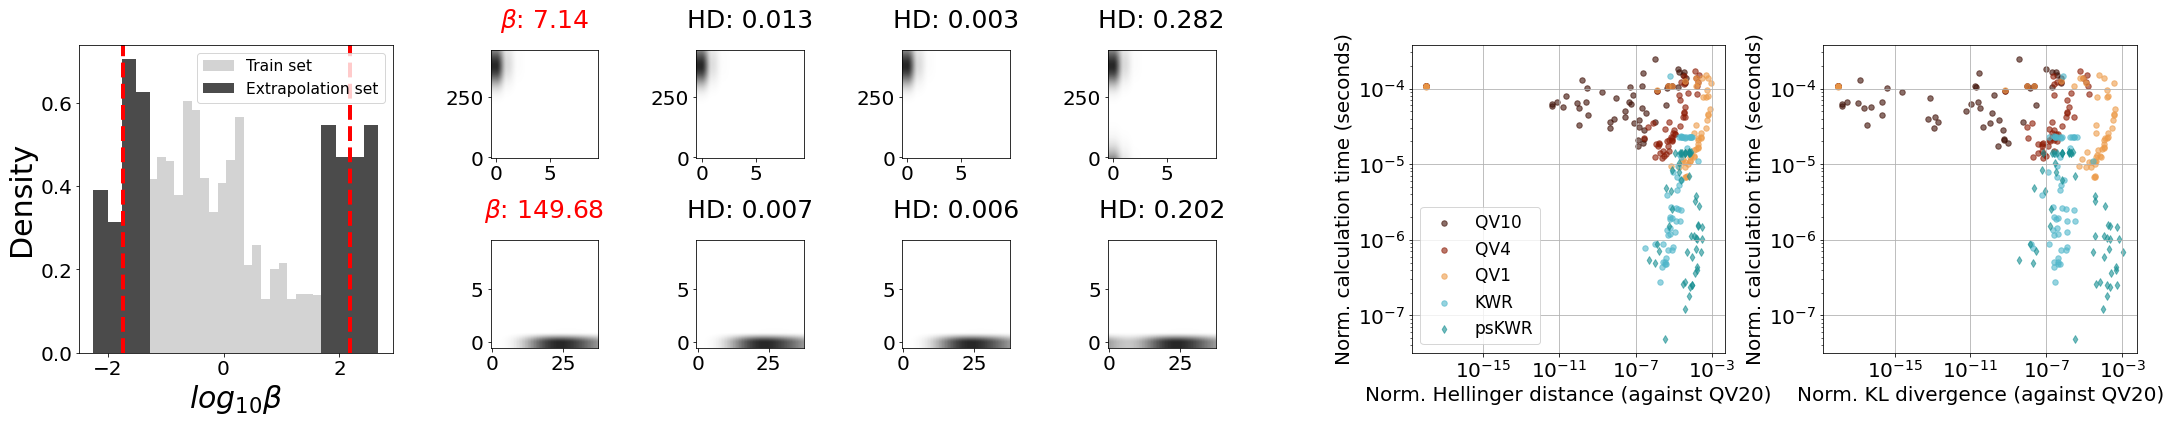

In [209]:
fs_small = 25
fs = 30
p1 = params_beta_out[18]
p2 = params_beta_out[-2]
cmap = 'binary'

lim_list = []
lim_large_list = []

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p1[0],10**p1[1],10**p1[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )
print(lim_large_list)

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p2[0],10**p2[1],10**p2[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )

pmf_list1 =  [fitmodel_qv.eval_model_pss(p1,limits=lim_large_list[0])[:lim_list[0][0],:lim_list[0][1]],
             fitmodel_KWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_psKWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_qv.eval_model_pss(p1,limits=lim_list[0]),]

pmf_list2 =  [fitmodel_qv.eval_model_pss(p2,limits=lim_large_list[1])[:lim_list[1][0],:lim_list[1][1]],
             fitmodel_KWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_psKWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_qv.eval_model_pss(p2,limits=lim_list[1]),]


fig = plt.figure(tight_layout=True,figsize = (30,6) )

gs = gridspec.GridSpec(2, 11, width_ratios = [1,1,1,1,1,1,.005,1,1,1,1])
ax = fig.add_subplot(gs[:,:2])
ax.hist(beta_dict['train'],bins=20,color='lightgray',density=True,label='Train set')
ax.hist(params_beta_out[:,1],bins=20,color=mpl.colormaps[cmap](180),density=True,label='Extrapolation set')
ax.set_ylabel('Density',fontsize=fs)
ax.set_xlabel('$log_{10} \\beta$',fontsize=fs)
ax.legend(fontsize=15.5)
ax.axvline(x=p1[1],color='red',linestyle='--',linewidth=4.0)
ax.axvline(x=p2[1],color='red',linestyle='--',linewidth=4.0)
# ax.hist(params_beta_out[:50,1],bins=12,color='red',density=True)
# ax.hist(params_beta_out[50:,1],bins=12,color='red',density=True)

for i in range(2,6):
    print(i)
    # plot a given example
    ax = fig.add_subplot(gs[0,i])
    ax.imshow((pmf_list1[i-2]), aspect=lim_list[0][1]/lim_list[0][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()

    if i != 2:
        kld_ = get_kld(pmf_list1[0],pmf_list1[i-2])
        hell_ = get_hellinger(pmf_list1[0],pmf_list1[i-2])
        ax.set_title(f'HD: {hell_:.3f}',fontsize=fs_small,y=1.15)
    if i == 2:
        ax.set_title(f'$\\beta$: {10**p1[0]:.2f}',color='red',
                     fontsize=fs_small,y = 1.15)
    
    
    # plot
    ax = fig.add_subplot(gs[1,i])
    ax.imshow((pmf_list2[i-2]), aspect=lim_list[1][1]/lim_list[1][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    
    if i != 2:
        kld_ = get_kld(pmf_list2[1],pmf_list2[i-2])
        hell_ = get_hellinger(pmf_list2[0],pmf_list2[i-2])
        ax.set_title(f'HD: {hell_:.3f}',fontsize=fs_small,y=1.15)
    if i == 2:
        ax.set_title(f'$\\beta$: {10**p2[1]:.2f}',color='red',
                     fontsize=fs_small,y = 1.15)

ax = fig.add_subplot(gs[:,7:9])

norm_unnorm = 'norm'

cmap_quad = ("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d") #greek
cmap_ml = ( "#b86092", "#79ad41", "#4fb6ca", "#178f92", "#d7aca1") # austria, isfahan1 and isfahan2

color_dict = {
    'QV20' : 'gray',
    'QV10' : "#3c0d03",
    'QV4' : "#8d1c06",
    'QV1' : "#ed9b49",
    'DR' : "#b86092",
    'MMNB' : "#79ad41",
    'KWR' : "#4fb6ca",
    'psKWR' : "#178f92",
}


alpha=0.6
EPS = 1e-18
methods = ['QV10','QV4','QV1','KWR','psKWR']
for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(hellinger_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

ax.set_xlabel('Norm. Hellinger distance (against QV20)',fontsize=20)
ax.set_ylabel('Norm. calculation time (seconds)',fontsize=20)
ax.grid()
ax.legend(fontsize=17,loc='lower left')
ax.set_yscale('log')
ax.set_xscale('log')


ax = fig.add_subplot(gs[:,9:11])

for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(kld_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

ax.set_xlabel('Norm. KL divergence (against QV20)',fontsize=20)
ax.set_ylabel('Norm. calculation time (seconds)',fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')


plt.savefig('./beta_OutOfBounds.png',dpi=400,bbox_inches='tight');

# $\gamma$ out of bounds

In [216]:
hellinger_dict = pickle.load( open( "./hellinger_dict_gamma", "rb" ) )
kld_dict = pickle.load( open( "./kld_dict_gamma", "rb" ) )
timing_dict = pickle.load( open( "./timing_dict_gamma", "rb" ) )

[[3562, 12]]
getting prob joint
getting prob joint
2
3
4
5


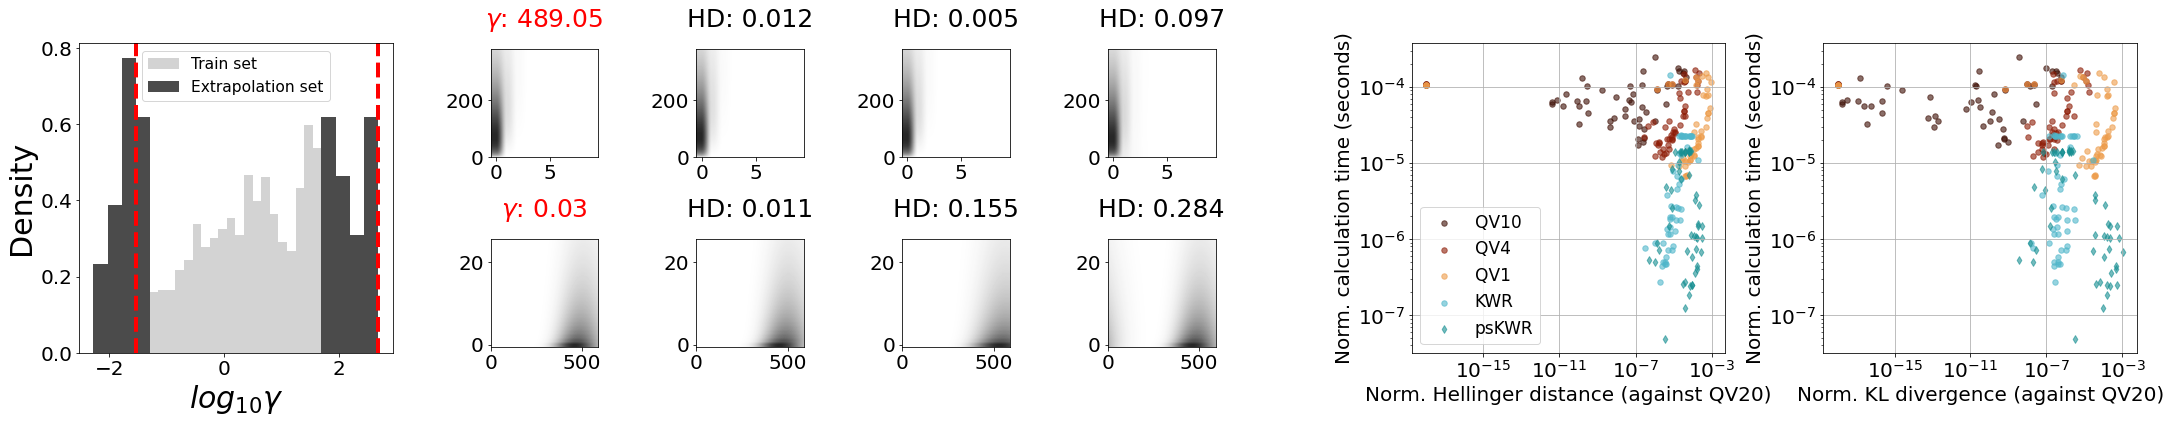

In [218]:
fs_small = 25
fs = 30
p1 = params_gamma_out[-8]
p2 = params_gamma_out[25]
cmap = 'binary'

lim_list = []
lim_large_list = []

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p1[0],10**p1[1],10**p1[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )
print(lim_large_list)

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p2[0],10**p2[1],10**p2[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )

pmf_list1 =  [fitmodel_qv.eval_model_pss(p1,limits=lim_large_list[0])[:lim_list[0][0],:lim_list[0][1]],
             fitmodel_KWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_psKWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_qv.eval_model_pss(p1,limits=lim_list[0]),]

pmf_list2 =  [fitmodel_qv.eval_model_pss(p2,limits=lim_large_list[1])[:lim_list[1][0],:lim_list[1][1]],
             fitmodel_KWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_psKWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_qv.eval_model_pss(p2,limits=lim_list[1])]


fig = plt.figure(tight_layout=True,figsize = (30,6) )

gs = gridspec.GridSpec(2, 11, width_ratios = [1,1,1,1,1,1,.005,1,1,1,1])
ax = fig.add_subplot(gs[:,:2])
ax.hist(gamma_dict['train'],bins=20,color='lightgray',density=True,label='Train set')
ax.hist(params_gamma_out[:,2],bins=20,color=mpl.colormaps[cmap](180),density=True,label='Extrapolation set')
ax.set_ylabel('Density',fontsize=fs)
ax.set_xlabel('$log_{10} \gamma$',fontsize=fs)
ax.legend(fontsize=15.5)
ax.legend(fontsize=15.5)
ax.axvline(x=p1[2],color='red',linestyle='--',linewidth=4.0)
ax.axvline(x=p2[2],color='red',linestyle='--',linewidth=4.0)
# ax.hist(params_beta_out[:50,1],bins=12,color='red',density=True)
# ax.hist(params_beta_out[50:,1],bins=12,color='red',density=True)

for i in range(2,6):
    print(i)
    # plot a given example
    ax = fig.add_subplot(gs[0,i])
    ax.imshow((pmf_list1[i-2]), aspect=lim_list[0][1]/lim_list[0][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    
    
    if i != 2:
        kld_ = get_kld(pmf_list1[0],pmf_list1[i-2])
        hell_ = get_hellinger(pmf_list1[0],pmf_list1[i-2])
        ax.set_title(f'HD: {hell_:.3f}',fontsize=fs_small,y=1.15)
    if i == 2:
        ax.set_title(f'$\gamma$: {10**p1[2]:.2f}',color='red',
                     fontsize=fs_small,y = 1.15)

    
    
    # plot
    ax = fig.add_subplot(gs[1,i])
    ax.imshow((pmf_list2[i-2]), aspect=lim_list[1][1]/lim_list[1][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    
    
    if i != 2:
        kld_ = get_kld(pmf_list2[0],pmf_list2[i-2])
        hell_ = get_hellinger(pmf_list2[0],pmf_list2[i-2])
        ax.set_title(f'HD: {hell_:.3f}',fontsize=fs_small,y=1.15)
    if i == 2:
        ax.set_title(f'$\gamma$: {10**p2[2]:.2f}',color='red',
                     fontsize=fs_small,y = 1.15)

ax = fig.add_subplot(gs[:,7:9])

norm_unnorm = 'norm'

cmap_quad = ("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d") #greek
cmap_ml = ( "#b86092", "#79ad41", "#4fb6ca", "#178f92", "#d7aca1") # austria, isfahan1 and isfahan2

color_dict = {
    'QV20' : 'gray',
    'QV10' : "#3c0d03",
    'QV4' : "#8d1c06",
    'QV1' : "#ed9b49",
    'DR' : "#b86092",
    'MMNB' : "#79ad41",
    'KWR' : "#4fb6ca",
    'psKWR' : "#178f92",
}


alpha=0.6
EPS = 1e-18
methods = ['QV10','QV4','QV1','KWR','psKWR']
for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(hellinger_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

ax.set_xlabel('Norm. Hellinger distance (against QV20)',fontsize=20)
ax.set_ylabel('Norm. calculation time (seconds)',fontsize=20)
ax.grid()
ax.legend(fontsize=17,loc='lower left')
ax.set_yscale('log')
ax.set_xscale('log')


ax = fig.add_subplot(gs[:,9:11])

for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(kld_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

ax.set_xlabel('Norm. KL divergence (against QV20)',fontsize=20)
ax.set_ylabel('Norm. calculation time (seconds)',fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')


plt.savefig('./gamma_OutOfBounds.png',dpi=400,bbox_inches='tight');

# $b$ out of bounds

In [219]:
hellinger_dict = pickle.load( open( "./hellinger_dict_b", "rb" ) )
kld_dict = pickle.load( open( "./kld_dict_b", "rb" ) )
timing_dict = pickle.load( open( "./timing_dict_b", "rb" ) )

[[1048, 1970]]
getting prob joint
getting prob joint
2
3
4
5


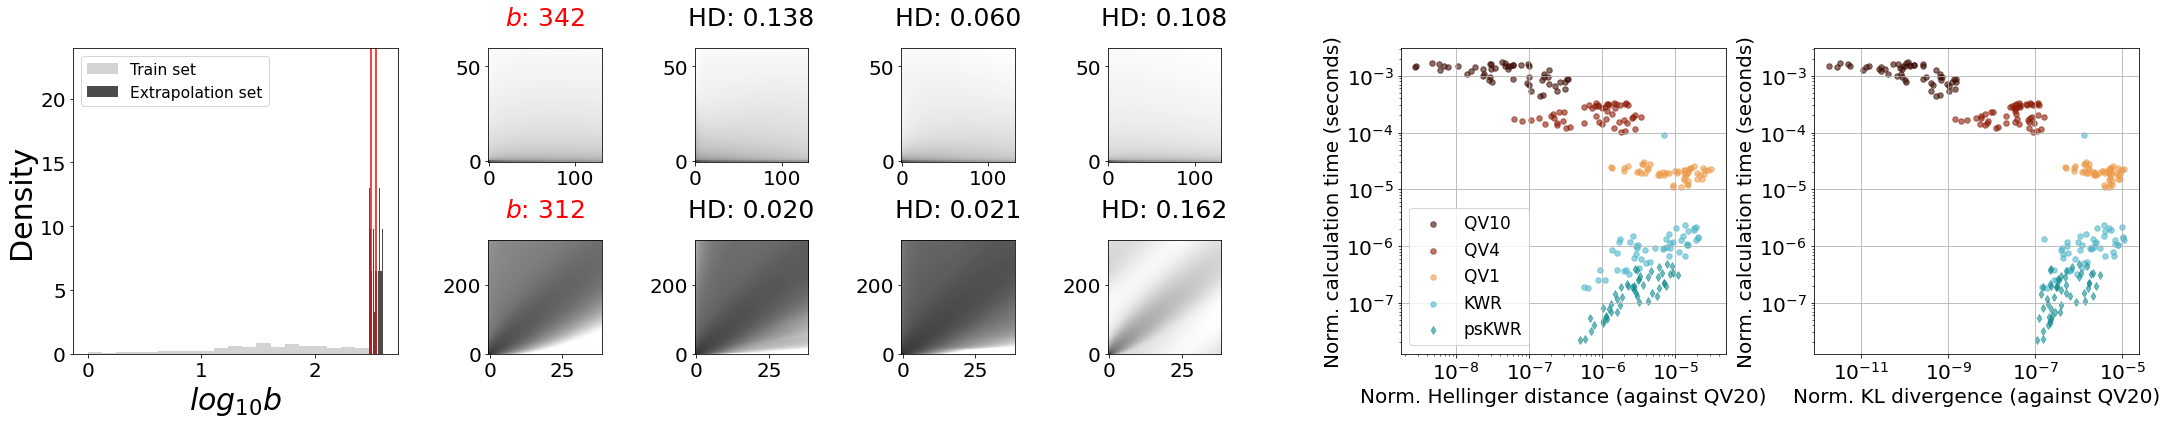

In [220]:
fs_small = 25
fs = 30
p1 = params_b_out[5]
p2 = params_b_out[-2]
cmap = 'binary'

lim_list = []
lim_large_list = []

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p1[0],10**p1[1],10**p1[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )
print(lim_large_list)

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p2[0],10**p2[1],10**p2[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )

pmf_list1 =  [fitmodel_qv.eval_model_pss(p1,limits=lim_large_list[0])[:lim_list[0][0],:lim_list[0][1]],
             fitmodel_KWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_psKWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_qv.eval_model_pss(p1,limits=lim_list[0]),]

pmf_list2 =  [fitmodel_qv.eval_model_pss(p2,limits=lim_large_list[1])[:lim_list[1][0],:lim_list[1][1]],
             fitmodel_KWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_psKWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_qv.eval_model_pss(p2,limits=lim_list[1]),]


fig = plt.figure(tight_layout=True,figsize = (30,6) )

gs = gridspec.GridSpec(2, 11, width_ratios = [1,1,1,1,1,1,.005,1,1,1,1])
ax = fig.add_subplot(gs[:,:2])
ax.hist(b_dict['train'],bins=20,color='lightgray',density=True,label='Train set')
ax.hist(params_b_out[:,0],bins=20,color=mpl.colormaps[cmap](180),density=True,label='Extrapolation set')
ax.set_ylabel('Density',fontsize=fs)
ax.set_xlabel('$log_{10} b$',fontsize=fs)
ax.legend(fontsize=15.5)
ax.axvline(x=p1[0],color='red')
ax.axvline(x=p2[0],color='red')
# ax.hist(params_beta_out[:50,1],bins=12,color='red',density=True)
# ax.hist(params_beta_out[50:,1],bins=12,color='red',density=True)

for i in range(2,6):
    print(i)
    # plot a given example
    ax = fig.add_subplot(gs[0,i])
    ax.imshow(np.log(pmf_list1[i-2]), aspect=lim_list[0][1]/lim_list[0][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    

    
    if i != 2:
        kld_ = get_kld(pmf_list1[0],pmf_list1[i-2])
        hell_ = get_hellinger(pmf_list1[0],pmf_list1[i-2])
        ax.set_title(f'HD: {hell_:.3f}',fontsize=fs_small,y=1.15)
    if i == 2:
        ax.set_title(f'$b$: {10**p1[0]:.0f}',color='red',
                     fontsize=fs_small,y = 1.15)

    
    
    # plot
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(np.log(pmf_list2[i-2]), aspect=lim_list[1][1]/lim_list[1][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    

    
    if i != 2:
        kld_ = get_kld(pmf_list2[0],pmf_list2[i-2])
        hell_ = get_hellinger(pmf_list2[0],pmf_list2[i-2])
        ax.set_title(f'HD: {hell_:.3f}',fontsize=fs_small,y=1.15)
    if i == 2:
        ax.set_title(f'$b$: {10**p2[0]:.0f}',color='red',
                     fontsize=fs_small,y = 1.15)

ax = fig.add_subplot(gs[:,7:9])

norm_unnorm = 'norm'

cmap_quad = ("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d") #greek
cmap_ml = ( "#b86092", "#79ad41", "#4fb6ca", "#178f92", "#d7aca1") # austria, isfahan1 and isfahan2

color_dict = {
    'QV20' : 'gray',
    'QV10' : "#3c0d03",
    'QV4' : "#8d1c06",
    'QV1' : "#ed9b49",
    'DR' : "#b86092",
    'MMNB' : "#79ad41",
    'KWR' : "#4fb6ca",
    'psKWR' : "#178f92",
}


alpha=0.6
EPS = 1e-18
methods = ['QV10','QV4','QV1','KWR','psKWR']
for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(hellinger_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

ax.set_xlabel('Norm. Hellinger distance (against QV20)',fontsize=20)
ax.set_ylabel('Norm. calculation time (seconds)',fontsize=20)
ax.grid()
ax.legend(fontsize=17,loc='lower left')
ax.set_yscale('log')
ax.set_xscale('log')


ax = fig.add_subplot(gs[:,9:11])

for i,method in enumerate(methods):
    if method == 'psKWR':
        marker = 'd'
    else:
        marker = 'o'
    plt.scatter(kld_dict[method][norm_unnorm]+EPS,timing_dict[method][norm_unnorm],
           label=method,s=30,c=color_dict[method],clip_on=False,alpha=alpha,marker=marker)

ax.set_xlabel('Norm. KL divergence (against QV20)',fontsize=20)
ax.set_ylabel('Norm. calculation time (seconds)',fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')


plt.savefig('./b_OutOfBounds.png',dpi=400,bbox_inches='tight');

[[669, 445]]
[[669, 445], [583, 468]]
0
1
2
3


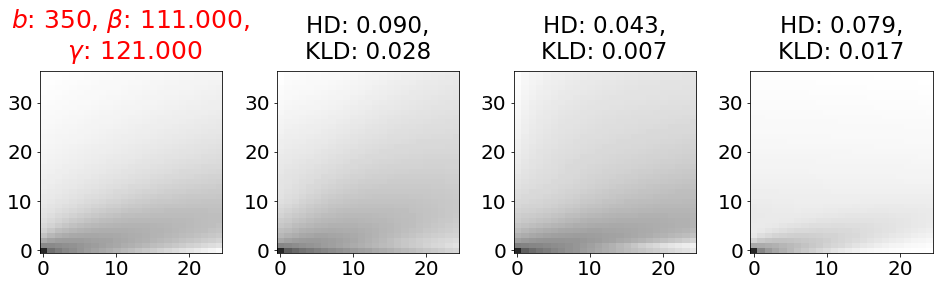

In [11]:
# now, for two that are totally out of bounds
cmap = 'binary'

p1 = np.log10(np.array([350,111,121]))
p2 = np.log10(np.array([330,130,110]))


lim_list = []
lim_large_list = []

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p1[0],10**p1[1],10**p1[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )
print(lim_large_list)

mu_n,mu_m,var_n,var_m,std_n,std_m,COV = get_moments(10**p2[0],10**p2[1],10**p2[2])
lim_list.append( [int(np.max([np.ceil(mu_n+1*std_n),10])),int(np.max([np.ceil(mu_m+1*std_m),10]))] )
lim_large_list.append( [int(np.max([np.ceil(mu_n+20*std_n),10])),int(np.max([np.ceil(mu_m+20*std_m),10]))] )
print(lim_large_list)
pmf_list1 =  [fitmodel_qv.eval_model_pss(p1,limits=lim_large_list[0])[:lim_list[0][0],:lim_list[0][1]],
             fitmodel_KWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_psKWR.eval_model_pss(p1,limits=lim_list[0]),
             fitmodel_qv.eval_model_pss(p1,limits=lim_list[0]),]

pmf_list2 =  [fitmodel_qv.eval_model_pss(p2,limits=lim_large_list[1])[:lim_list[1][0],:lim_list[1][1]],
             fitmodel_KWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_psKWR.eval_model_pss(p2,limits=lim_list[1]),
             fitmodel_qv.eval_model_pss(p2,limits=lim_list[1]),]



fig,axs = plt.subplots(1,4,figsize=(16,4),gridspec_kw = {'wspace':0.3, 'hspace':0.7})

for i in range(0,4):
    print(i)
    # plot a given example
    ax = axs[i]
    ax.imshow(np.log(pmf_list1[i]), aspect=lim_list[0][1]/lim_list[0][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    

    
    if i != 0:
        kld_ = get_kld(pmf_list1[0],pmf_list1[i])
        hell_ = get_hellinger(pmf_list1[0],pmf_list1[i])
        ax.set_title(f'HD: {hell_:.3f},\nKLD: {kld_:.3f}',fontsize=23,y=1.03)
    if i == 0:
        ax.set_title(f'$b$: {10**p1[0]:.0f}, $\\beta$: {10**p1[1]:.3f},\n $\gamma$: {10**p1[2]:.3f}',color='red',
                     fontsize=25,y = 1.03)

    
    
#     # plot
#     ax = axs[1,i]
#     ax.imshow(np.log(pmf_list2[i-2]), extent=[0,lim_list[1][0],0,lim_list[1][1]], 
#                                      aspect=lim_list[1][0]/lim_list[1][1],cmap=cmap,alpha=0.85)
    

    
#     if i != 0:
#         kld_ = get_kld(pmf_list2[0],pmf_list2[i-2])
#         hell_ = get_hellinger(pmf_list2[0],pmf_list2[i-2])
#         ax.set_title(f'HD: {hell_:.3f}',fontsize=15,y=1.001)
#     if i == 0:
#         ax.set_title(f'$b$: {10**p2[0]:.0f}, $\\beta$: {10**p2[1]:.0f}, $\gamma$: {10**p2[2]:.0f},',color='red',
#                      fontsize=15,y = 1.001)

# fig.subplots_adjust(wspace=0, hspace=0.5)       
# plt.tight_layout()
plt.savefig('./all_OutOfBounds1.png',dpi=400,bbox_inches='tight');

0
1
2
3


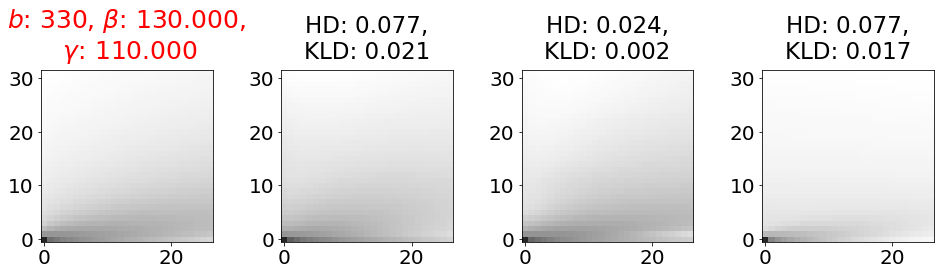

In [12]:
fig,axs = plt.subplots(1,4,figsize=(16,4),gridspec_kw = {'wspace':0.4, 'hspace':0.7})

for i in range(0,4):
    print(i)

    
    
    # plot
    ax = axs[i]
    ax.imshow(np.log(pmf_list2[i]), aspect=lim_list[1][1]/lim_list[1][0],cmap=cmap,alpha=0.85)
    ax.invert_yaxis()
    

    
    if i != 0:
        kld_ = get_kld(pmf_list2[0],pmf_list2[i])
        hell_ = get_hellinger(pmf_list2[0],pmf_list2[i])
        ax.set_title(f'HD: {hell_:.3f},\nKLD: {kld_:.3f}',fontsize=23,y=1.03)
    if i == 0:
        ax.set_title(f'$b$: {10**p2[0]:.0f}, $\\beta$: {10**p2[1]:.3f},\n $\gamma$: {10**p2[2]:.3f}',color='red',
                     fontsize=25,y = 1.03)

# fig.subplots_adjust(wspace=0, hspace=0.5)       
# plt.tight_layout()
plt.savefig('./all_OutOfBounds2.png',dpi=400,bbox_inches='tight');

In [116]:
len(beta_dict['train'])

211515